# Tic Tac Toe Model

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jl

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error

kfold = KFold(n_splits=10, random_state=1, shuffle=True)

## Importing Data

In [2]:
final = np.loadtxt('tictac_final.txt')
X_final = final[:,:9]
y_final = final[:,9:]
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.2, random_state=1)

single = np.loadtxt('tictac_single.txt')
X_single = single[:,:9]
y_single = single[:,9:]
X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(X_single, y_single, test_size=0.2, random_state=1)

multi = np.loadtxt('tictac_multi.txt')
X_multi = multi[:,:9]
y_multi = multi[:,9:]
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=1)


## Classifiers: Final boards classification

### Linear SVM

In [3]:
linear_svm_final_clf = SVC(kernel='linear')
linear_svm_final_clf.fit(X_final_train, y_final_train.ravel())

scores = cross_val_score(linear_svm_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.03)


<Axes: >

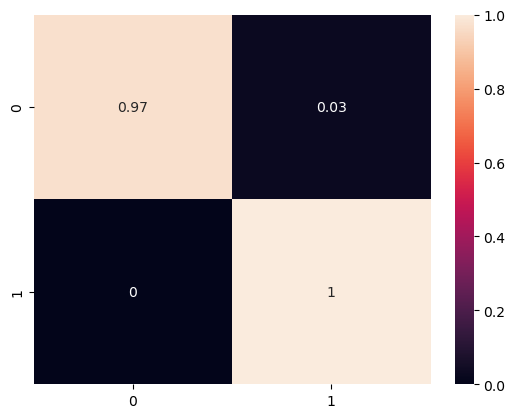

In [4]:
y_final_linear_svm_pred = cross_val_predict(linear_svm_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

linear_svm_final_conf_mx = confusion_matrix(y_final_test, y_final_linear_svm_pred, normalize='true')
sns.heatmap(linear_svm_final_conf_mx, annot=True)

### K-Nearest Neighbors

In [5]:
kn_final_clf = KNeighborsClassifier(n_neighbors=10)
kn_final_clf.fit(X_final_train, y_final_train.ravel())

scores = cross_val_score(kn_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.08)


<Axes: >

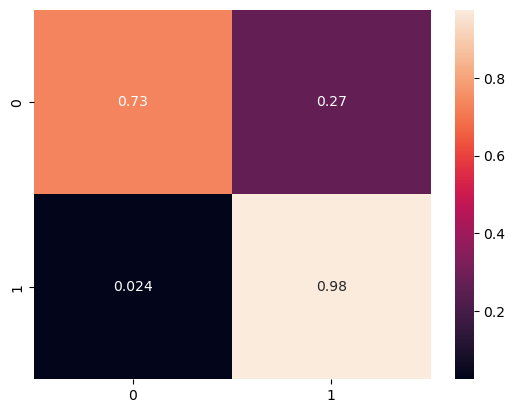

In [6]:
y_final_kn_pred = cross_val_predict(kn_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

kn_final_conf_mx = confusion_matrix(y_final_test, y_final_kn_pred, normalize='true')
sns.heatmap(kn_final_conf_mx, annot=True)

### Multilayer Perceptron

In [7]:
mlp_final_clf = MLPClassifier(random_state=1, solver='lbfgs', max_iter=500)
mlp_final_clf.fit(X_final_train, y_final_train.ravel())

scores = cross_val_score(mlp_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.10)


<Axes: >

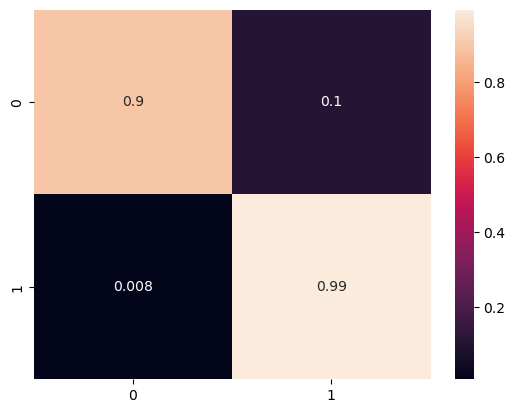

In [8]:
y_final_mlp_pred = cross_val_predict(mlp_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

mlp_final_conf_mx = confusion_matrix(y_final_test, y_final_mlp_pred, normalize='true')
sns.heatmap(mlp_final_conf_mx, annot=True)

## Classifiers: Intermediate boards optimal play (single label)

### Linear SVM

In [9]:
linear_svm_single_clf = SVC(kernel='linear')
linear_svm_single_clf.fit(X_single_train, y_single_train.ravel())

scores = cross_val_score(linear_svm_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.40 (+/- 0.13)


<Axes: >

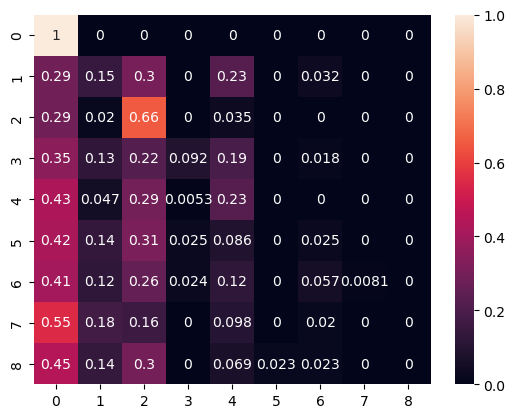

In [10]:
y_single_linear_svm_pred = cross_val_predict(linear_svm_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

linear_svm_single_conf_mx = confusion_matrix(y_single_test, y_single_linear_svm_pred, normalize='true')
sns.heatmap(linear_svm_single_conf_mx, annot=True)

### K-Nearest Neighbors

In [11]:
kn_single_clf = KNeighborsClassifier(n_neighbors=10)
kn_single_clf.fit(X_single_train, y_single_train.ravel())

scores = cross_val_score(kn_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.61 (+/- 0.04)


<Axes: >

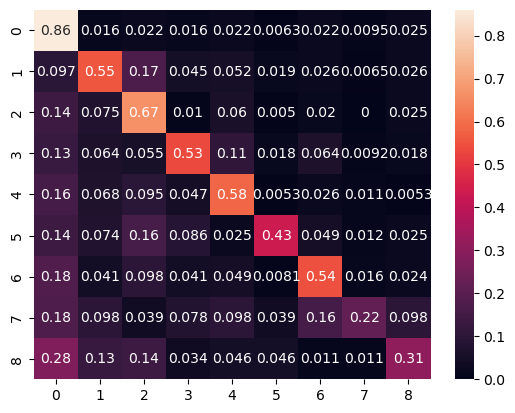

In [12]:
y_single_kn_pred = cross_val_predict(kn_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

kn_single_conf_mx = confusion_matrix(y_single_test, y_single_kn_pred, normalize='true')
sns.heatmap(kn_single_conf_mx, annot=True)

### Multilayer Perceptron

In [13]:
mlp_single_clf = MLPClassifier(random_state=1, solver='lbfgs', max_iter=500)
mlp_single_clf.fit(X_single_train, y_single_train.ravel())

scores = cross_val_score(mlp_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.03)


<Axes: >

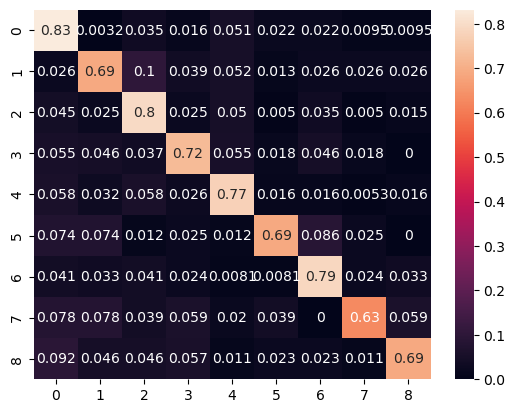

In [14]:
y_single_mlp_pred = cross_val_predict(mlp_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

mlp_single_conf_mx = confusion_matrix(y_single_test, y_single_mlp_pred, normalize='true')
sns.heatmap(mlp_single_conf_mx, annot=True)

## Regressors: Intermediate boards optimal play (multi label)

### K-Nearest Neighbors

In [15]:
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_multi_train, y_multi_train)

scores = cross_val_score(knn_reg, X_multi_test, y_multi_test, cv=kfold, scoring='neg_mean_squared_error')

print("Average MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

Average MSE: 0.10 (+/- 0.01)


<Axes: >

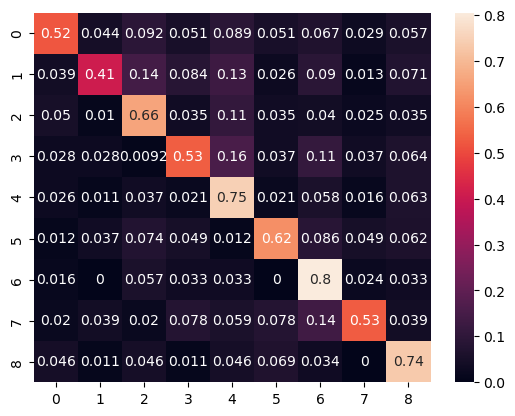

In [16]:
y_multi_knn_pred = cross_val_predict(knn_reg, X_multi_test, y_multi_test, cv=kfold)


y_pred_conf = np.argmax(y_multi_knn_pred, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
knn_multi_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(knn_multi_conf_mx, annot=True)

In [17]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, y_multi_knn_pred))

Mean Squared Error: 0.0973


In [18]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, y_multi_knn_pred))

Mean Absolute Error: 0.2246


### Linear Regression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_multi_train, y_multi_train)

scores = cross_val_score(lin_reg, X_multi_test, y_multi_test, cv=kfold, scoring='neg_mean_squared_error')

print("Average MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

Average MSE: 0.17 (+/- 0.01)


<Axes: >

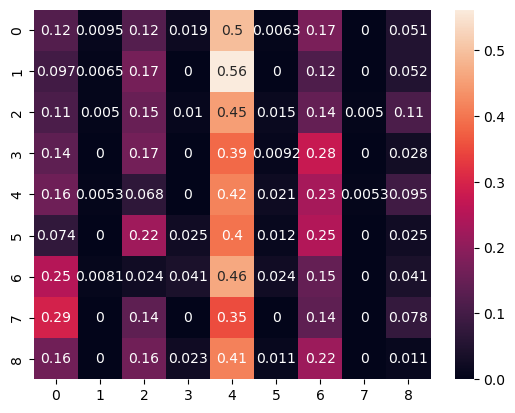

In [20]:
y_multi_lin_pred = cross_val_predict(lin_reg, X_multi_test, y_multi_test, cv=kfold)


y_pred_conf = np.argmax(y_multi_lin_pred, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
lin_multi_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(lin_multi_conf_mx, annot=True)

In [21]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, y_multi_lin_pred))

Mean Squared Error: 0.1727


In [22]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, y_multi_lin_pred))

Mean Absolute Error: 0.3422


### Multilayer Perceptron

In [23]:
mlp_reg = MLPRegressor(random_state=1, max_iter=500)
mlp_reg.fit(X_multi_train, y_multi_train)

scores = cross_val_score(mlp_reg, X_multi_test, y_multi_test, cv=kfold, scoring='neg_mean_squared_error')

print("Average MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

Average MSE: 0.08 (+/- 0.00)


<Axes: >

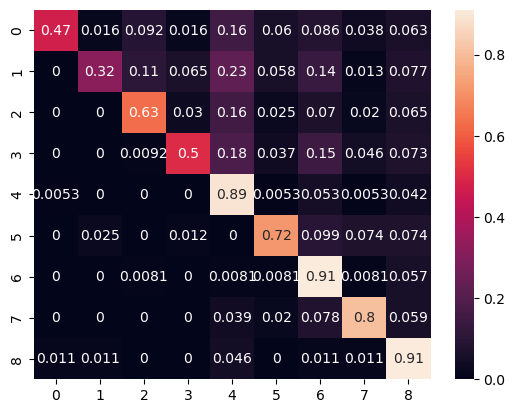

In [24]:
y_multi_mlp_pred = cross_val_predict(mlp_reg, X_multi_test, y_multi_test, cv=kfold)


y_pred_conf = np.argmax(y_multi_mlp_pred, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
lin_multi_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(lin_multi_conf_mx, annot=True)

In [25]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, y_multi_mlp_pred))

Mean Squared Error: 0.0811


In [26]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, y_multi_mlp_pred))

Mean Absolute Error: 0.2161


## Output

In [27]:
jl.dump(knn_reg, 'knn.pkl')
jl.dump(lin_reg, 'lin.pkl')
jl.dump(mlp_reg, 'mlp.pkl')

['mlp.pkl']

# Extra Credit

## Implement Linear Regression using Normal equations.

In [28]:
theta = np.linalg.inv(X_multi_train.T.dot(X_multi_train)).dot(X_multi_train.T).dot(y_multi_train)

print("Coefficients (theta): ", theta)

Coefficients (theta):  [[0.21500825 0.18289514 0.232416   0.17104961 0.29846352 0.1889793
  0.2275481  0.19512963 0.2509209 ]
 [0.239544   0.16055961 0.24323956 0.18999585 0.29426689 0.18912913
  0.22595878 0.16903757 0.23085631]
 [0.22897192 0.178111   0.21907057 0.1893988  0.29748481 0.18456636
  0.24799927 0.19528244 0.23592831]
 [0.24274362 0.19025824 0.22061587 0.15286343 0.29816093 0.16624067
  0.23188547 0.18969829 0.23553917]
 [0.24099751 0.19489706 0.24505427 0.1808242  0.27910799 0.18010389
  0.24558596 0.18804016 0.24565534]
 [0.22854967 0.18624935 0.24416874 0.16451641 0.30578967 0.15426207
  0.23032796 0.18881669 0.24450775]
 [0.24076697 0.19870989 0.25792647 0.17980505 0.31021414 0.19997527
  0.21463106 0.18601129 0.25051393]
 [0.22255344 0.17425959 0.21585958 0.18122324 0.2938737  0.18914342
  0.23870105 0.15334214 0.2444525 ]
 [0.257317   0.20754636 0.24468984 0.20072494 0.30689646 0.17667829
  0.23484975 0.17361028 0.21797355]]


Predictions:  [[ 0.23992316  0.18644469  0.29353115 ...  0.177517    0.15076788
   0.23314187]
 [ 0.26133657  0.22798776  0.31030959 ...  0.20922226  0.20539783
   0.23300356]
 [ 0.23477074  0.18672013  0.22961731 ...  0.22300415  0.15053675
   0.25045869]
 ...
 [-0.0737238  -0.01114732 -0.00322874 ... -0.02707179  0.00291345
   0.06037071]
 [ 0.2058117   0.16974865  0.24132219 ...  0.23176595  0.16130626
   0.28071373]
 [ 0.1898628   0.18315841  0.18417305 ...  0.2466243   0.23746252
   0.27355851]]


<Axes: >

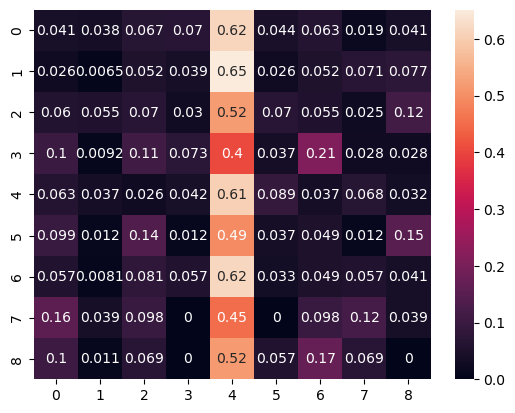

In [29]:
predictions = X_multi_test.dot(theta)
print("Predictions: ", predictions)

y_pred_conf = np.argmax(predictions, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
lin_multi_normal_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(lin_multi_normal_conf_mx, annot=True)

In [30]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, predictions))

Mean Squared Error: 0.1887


In [31]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, predictions))

Mean Absolute Error: 0.3026


## Train the models on 1/10th of the data and explain what happens

In [32]:
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, train_size=0.1, test_size=0.2, random_state=2)
X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(X_single, y_single, train_size=0.1, test_size=0.2, random_state=2)
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, train_size=0.1, test_size=0.2, random_state=2)

### Classifiers: Final boards classification

#### Linear SVM

In [33]:
linear_svm_final_clf = SVC(kernel='linear')
linear_svm_final_clf.fit(X_final_train, y_final_train.ravel())

scores = cross_val_score(linear_svm_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


<Axes: >

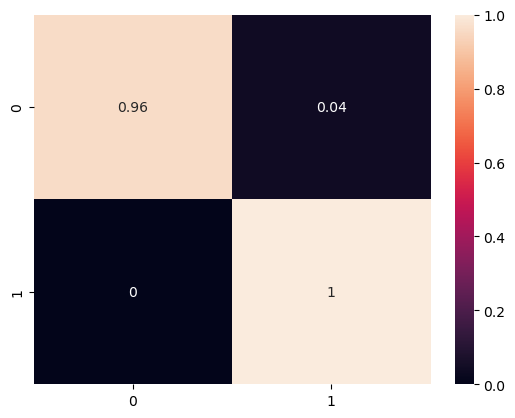

In [34]:
y_final_linear_svm_pred = cross_val_predict(linear_svm_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

linear_svm_final_conf_mx = confusion_matrix(y_final_test, y_final_linear_svm_pred, normalize='true')
sns.heatmap(linear_svm_final_conf_mx, annot=True)

#### K-Nearest Neighbors

In [35]:
kn_final_clf = KNeighborsClassifier(n_neighbors=10)
kn_final_clf.fit(X_final_train, y_final_train.ravel())

scores = cross_val_score(kn_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.10)


<Axes: >

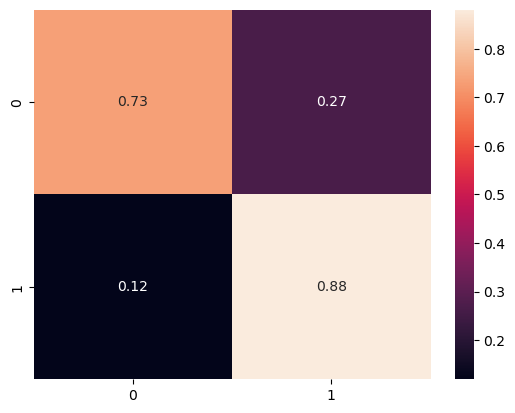

In [36]:
y_final_kn_pred = cross_val_predict(kn_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

kn_final_conf_mx = confusion_matrix(y_final_test, y_final_kn_pred, normalize='true')
sns.heatmap(kn_final_conf_mx, annot=True)

#### Multilayer Perceptron

In [37]:
mlp_final_clf = MLPClassifier(random_state=1, solver='lbfgs', max_iter=500)
mlp_final_clf.fit(X_final_train, y_final_train.ravel())

scores = cross_val_score(mlp_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.03)


<Axes: >

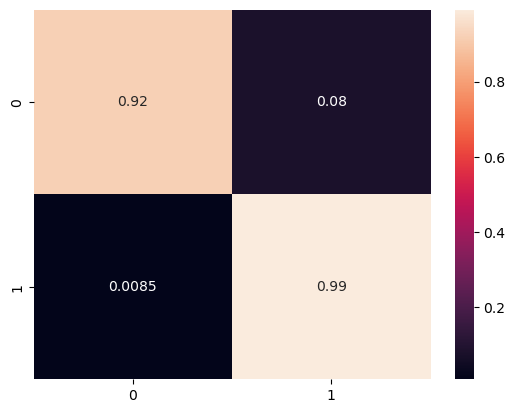

In [38]:
y_final_mlp_pred = cross_val_predict(mlp_final_clf, X_final_test, y_final_test.ravel(), cv=kfold)

mlp_final_conf_mx = confusion_matrix(y_final_test, y_final_mlp_pred, normalize='true')
sns.heatmap(mlp_final_conf_mx, annot=True)

### Classifiers: Intermediate boards optimal play (single label)

#### Linear SVM

In [39]:
linear_svm_single_clf = SVC(kernel='linear')
linear_svm_single_clf.fit(X_single_train, y_single_train.ravel())

scores = cross_val_score(linear_svm_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.40 (+/- 0.08)


<Axes: >

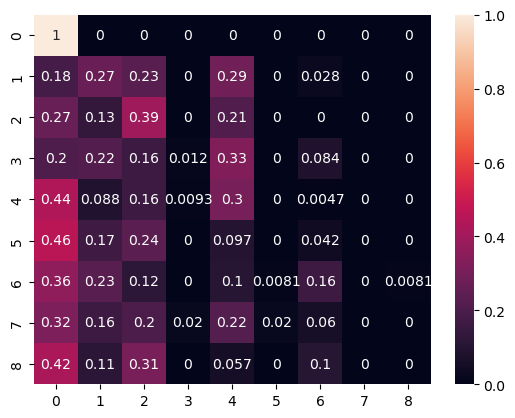

In [40]:
y_single_linear_svm_pred = cross_val_predict(linear_svm_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

linear_svm_single_conf_mx = confusion_matrix(y_single_test, y_single_linear_svm_pred, normalize='true')
sns.heatmap(linear_svm_single_conf_mx, annot=True)

#### K-Nearest Neighbors

In [41]:
kn_single_clf = KNeighborsClassifier(n_neighbors=10)
kn_single_clf.fit(X_single_train, y_single_train.ravel())

scores = cross_val_score(kn_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.04)


<Axes: >

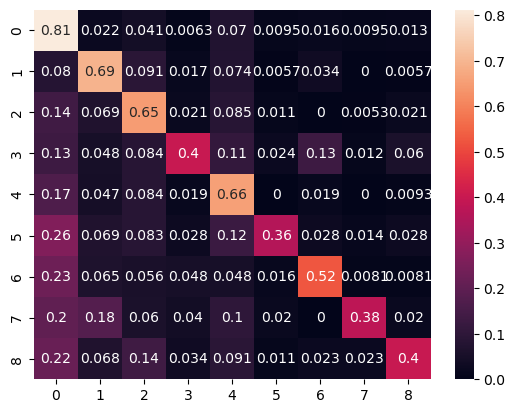

In [42]:
y_single_kn_pred = cross_val_predict(kn_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

kn_single_conf_mx = confusion_matrix(y_single_test, y_single_kn_pred, normalize='true')
sns.heatmap(kn_single_conf_mx, annot=True)

#### Multilayer Perceptron

In [43]:
mlp_single_clf = MLPClassifier(random_state=1, solver='lbfgs', max_iter=500)
mlp_single_clf.fit(X_single_train, y_single_train.ravel())

scores = cross_val_score(mlp_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.06)


<Axes: >

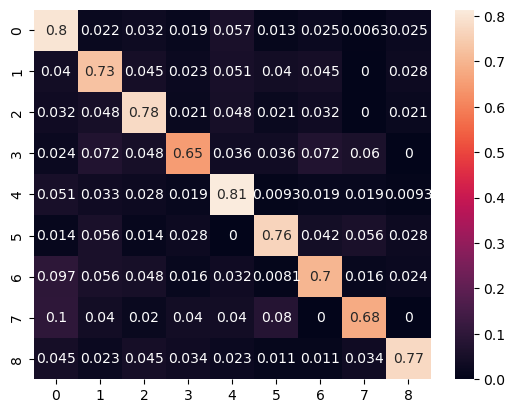

In [44]:
y_single_mlp_pred = cross_val_predict(mlp_single_clf, X_single_test, y_single_test.ravel(), cv=kfold)

mlp_single_conf_mx = confusion_matrix(y_single_test, y_single_mlp_pred, normalize='true')
sns.heatmap(mlp_single_conf_mx, annot=True)

### Regressors: Intermediate boards optimal play (multi label)

#### K-Nearest Neighbors

In [45]:
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_multi_train, y_multi_train)

scores = cross_val_score(knn_reg, X_multi_test, y_multi_test, cv=kfold, scoring='neg_mean_squared_error')

print("Average MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

Average MSE: 0.10 (+/- 0.01)


<Axes: >

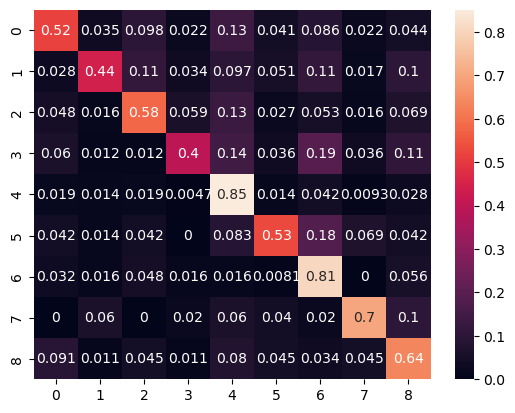

In [46]:
y_multi_knn_pred = cross_val_predict(knn_reg, X_multi_test, y_multi_test, cv=kfold)


y_pred_conf = np.argmax(y_multi_knn_pred, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
knn_multi_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(knn_multi_conf_mx, annot=True)

In [47]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, y_multi_knn_pred))

Mean Squared Error: 0.0990


In [48]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, y_multi_knn_pred))

Mean Absolute Error: 0.2244


#### Linear Regression

In [49]:
lin_reg = LinearRegression()
lin_reg.fit(X_multi_train, y_multi_train)

scores = cross_val_score(lin_reg, X_multi_test, y_multi_test, cv=kfold, scoring='neg_mean_squared_error')

print("Average MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

Average MSE: 0.17 (+/- 0.01)


<Axes: >

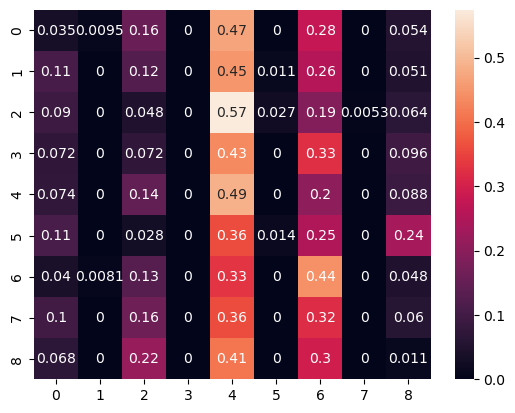

In [50]:
y_multi_lin_pred = cross_val_predict(lin_reg, X_multi_test, y_multi_test, cv=kfold)


y_pred_conf = np.argmax(y_multi_lin_pred, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
lin_multi_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(lin_multi_conf_mx, annot=True)

In [51]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, y_multi_lin_pred))

Mean Squared Error: 0.1706


In [52]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, y_multi_lin_pred))

Mean Absolute Error: 0.3380


#### Multilayer Perceptron

In [53]:
mlp_reg = MLPRegressor(random_state=1, max_iter=500)
mlp_reg.fit(X_multi_train, y_multi_train)

scores = cross_val_score(mlp_reg, X_multi_test, y_multi_test, cv=kfold, scoring='neg_mean_squared_error')

print("Average MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

Average MSE: 0.08 (+/- 0.00)


<Axes: >

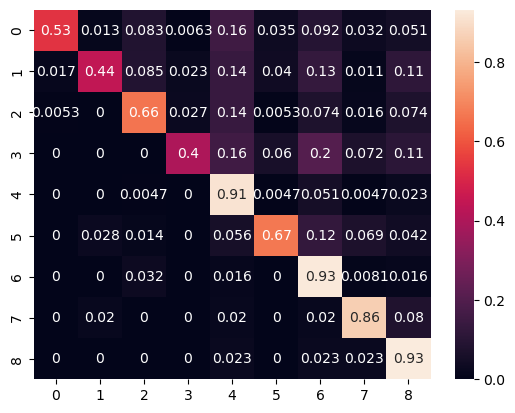

In [54]:
y_multi_mlp_pred = cross_val_predict(mlp_reg, X_multi_test, y_multi_test, cv=kfold)


y_pred_conf = np.argmax(y_multi_mlp_pred, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
lin_multi_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(lin_multi_conf_mx, annot=True)

In [55]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, y_multi_mlp_pred))

Mean Squared Error: 0.0828


In [56]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, y_multi_mlp_pred))

Mean Absolute Error: 0.2187


## Introducing noise

In [57]:
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, train_size=0.1, test_size=0.2, random_state=3)

In [58]:
#Adding random noise to 30% of the set
noise_frac = 0.3

y_noisy = y_multi_train

for i, prob_arr in enumerate(y_noisy):
    noisy_indicies = np.random.choice(9, 3)
    for j in noisy_indicies:
        y_noisy[i][j] += np.random.normal(1, 0.05, 1)
        
y_multi_train = y_noisy


### Regressors: Intermediate boards optimal play (multi label)

#### K-Nearest Neighbors

In [71]:
knn_reg = KNeighborsRegressor(n_neighbors=10)
knn_reg.fit(X_multi_train, y_multi_train)

scores = cross_val_score(knn_reg, X_multi_test, y_multi_test, cv=kfold, scoring='neg_mean_squared_error')

print("Average MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

Average MSE: 0.10 (+/- 0.00)


<Axes: >

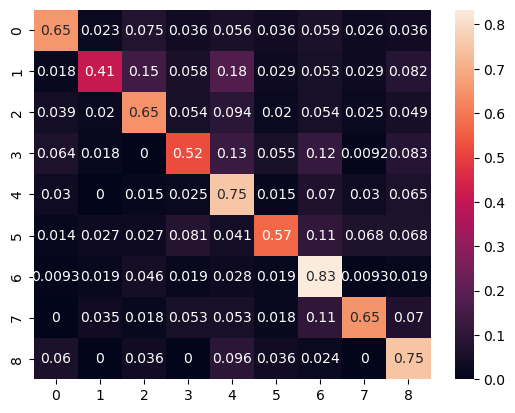

In [72]:
y_multi_knn_pred = cross_val_predict(knn_reg, X_multi_test, y_multi_test, cv=kfold)


y_pred_conf = np.argmax(y_multi_knn_pred, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
knn_multi_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(knn_multi_conf_mx, annot=True)

In [73]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, y_multi_knn_pred))

Mean Squared Error: 0.0977


In [74]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, y_multi_knn_pred))

Mean Absolute Error: 0.2259


#### Linear Regression

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_multi_train, y_multi_train)

scores = cross_val_score(lin_reg, X_multi_test, y_multi_test, cv=kfold, scoring='neg_mean_squared_error')

print("Average MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

Average MSE: 0.17 (+/- 0.00)


<Axes: >

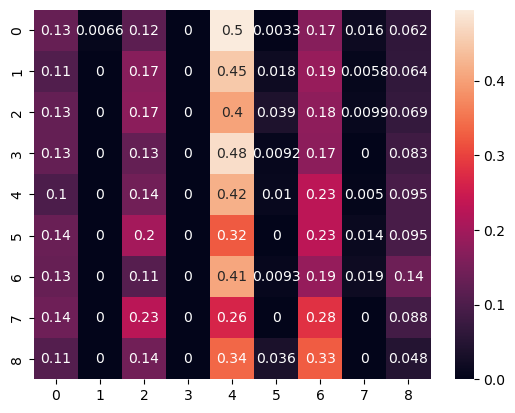

In [76]:
y_multi_lin_pred = cross_val_predict(lin_reg, X_multi_test, y_multi_test, cv=kfold)


y_pred_conf = np.argmax(y_multi_lin_pred, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
lin_multi_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(lin_multi_conf_mx, annot=True)

In [77]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, y_multi_lin_pred))

Mean Squared Error: 0.1713


In [78]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, y_multi_lin_pred))

Mean Absolute Error: 0.3393


#### Multilayer Perceptron

In [79]:
mlp_reg = MLPRegressor(random_state=1, max_iter=500)
mlp_reg.fit(X_multi_train, y_multi_train)

scores = cross_val_score(mlp_reg, X_multi_test, y_multi_test, cv=kfold, scoring='neg_mean_squared_error')

print("Average MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

Average MSE: 0.08 (+/- 0.00)


<Axes: >

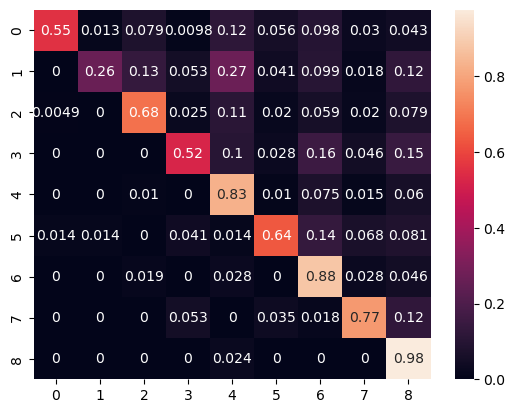

In [80]:
y_multi_mlp_pred = cross_val_predict(mlp_reg, X_multi_test, y_multi_test, cv=kfold)


y_pred_conf = np.argmax(y_multi_mlp_pred, axis=1)
y_test_conf = np.argmax(y_multi_test, axis=1)
lin_multi_conf_mx = confusion_matrix(y_test_conf, y_pred_conf , normalize='true')
sns.heatmap(lin_multi_conf_mx, annot=True)

In [81]:
print("Mean Squared Error: %0.4f" % mean_squared_error(y_multi_test, y_multi_mlp_pred))

Mean Squared Error: 0.0835


In [82]:
print("Mean Absolute Error: %0.4f" % mean_absolute_error(y_multi_test, y_multi_mlp_pred))

Mean Absolute Error: 0.2201
